<a href="https://colab.research.google.com/github/samsuzie/automated-financial/blob/main/Future_Funds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git clone https://github.com/samsuzie/automated-financial

Cloning into 'automated-financial'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 468.09 KiB | 6.59 MiB/s, done.


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("GOLDdata.csv")

In [ ]:
df['Date'].value_counts()

Date
10/27/2023    1
12-07-2015    1
12/18/2015    1
12/17/2015    1
12/16/2015    1
             ..
11/25/2019    1
11/22/2019    1
11/21/2019    1
11/20/2019    1
01-03-2012    1
Name: count, Length: 3060, dtype: int64

<Axes: >

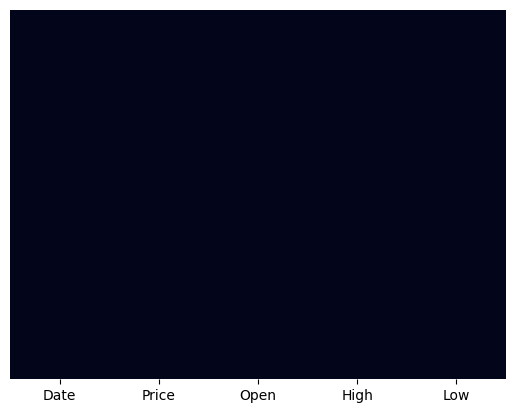

In [ ]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = None)

In [ ]:
def convert_dates(Date):
    try:
        return pd.to_datetime(Date, format='%d-%m-%Y')
    except ValueError:
        return pd.to_datetime(Date, format='%m/%d/%Y')
df['Date'] = df['Date'].apply(convert_dates)

In [ ]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
df

,Date,Price,Open,High,Low
0,2023-10-27,1998.5,1995.0,2019.7,1986.4
1,2023-10-26,1997.4,1991.2,2003.7,1981.6
2,2023-10-25,1994.9,1982.7,1998.6,1973.6
3,2023-10-24,1986.1,1984.1,1992.0,1964.6
4,2023-10-23,1987.8,1987.7,1994.3,1971.0
...,...,...,...,...,...
3055,2012-09-01,1608.1,1617.7,1624.6,1605.7
3056,2012-06-01,1616.8,1622.4,1632.3,1609.0
3057,2012-05-01,1620.1,1614.4,1626.8,1597.7
3058,2012-04-01,1612.7,1604.9,1619.8,1593.8


<Axes: ylabel='Price'>

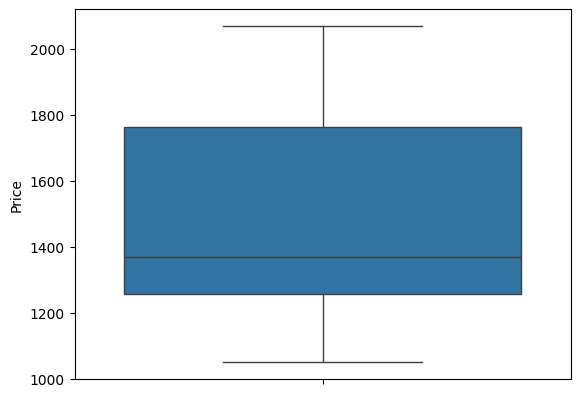

In [ ]:
sns.boxplot(df['Price'])

<Axes: ylabel='Open'>

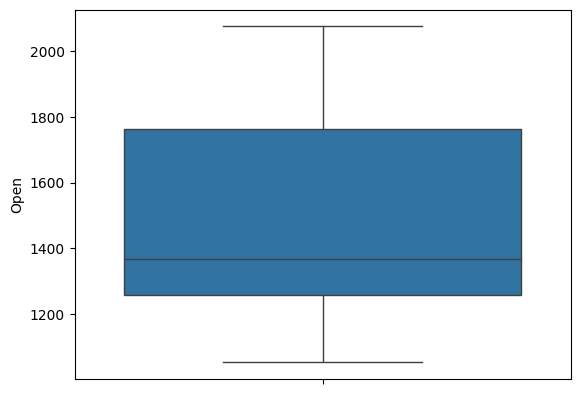

In [ ]:
sns.boxplot(df['Open'])

<Axes: ylabel='High'>

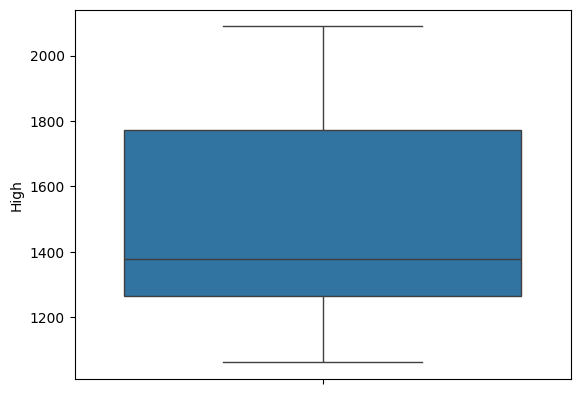

In [ ]:
sns.boxplot(df['High'])

In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(y=df.Price,x = df.Date)
fig.update_traces(line_color = 'black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="ScaledPrice",
                  title={'text':"Gold Price History Data",
                         'y':0.95,'x':0.5,'xanchor':'center','yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# for testing data we will take the last year only

In [ ]:
max(df['Date'])

'2023-12-10'

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])


test_size = df[df.Date.dt.year==2023].shape[0]
print(test_size)

219
